# Stock Price Prediction

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Reading the CSV file

In [2]:
stock_data = pd.read_csv('1613615-Stock_Price_data_set.csv', index_col='Date', parse_dates=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


## Basic Analysis

### 1. Basic information
We first use the <code>info()</code> method to view the basic info of the dataframe.

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


#### Insights:
We can see that there are no null values.

### 2. Description of numerical features
We can then use the <code>describe()</code> method to get more information on the numerical columns.

In [4]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


#### Insights:
We can see that the values of all columns, except <code>'Volume'</code> are nearly equal to each other."

### 3. Checking for duplicates
We can use the <code>duplicated()</code> method to find whether there are any duplicates in the data.

In [5]:
stock_data.duplicated().sum()

0

#### Insights:
There are no duplicates in the data.

## Exploratory Data Analysis
In this stage, we start by answering some of the common questions.

### 1. How does <code>Open</code> vary over time?

<AxesSubplot:xlabel='Date'>

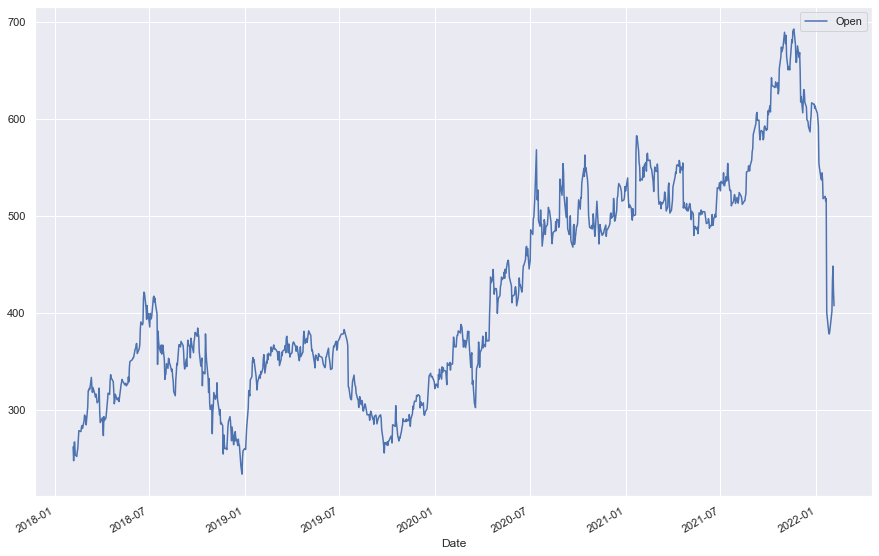

In [6]:
stock_data.plot(y='Open', figsize=(15,10))

#### Insights:
We can see that, even though there are sudden ups and downs, the values are mostly continuous.
<b>Hence, we might be able to estimate the future <code>Open</code> values using the previous values as features.</b>

### 2. How does <code>Volume</code> vary over time ?

<AxesSubplot:xlabel='Date'>

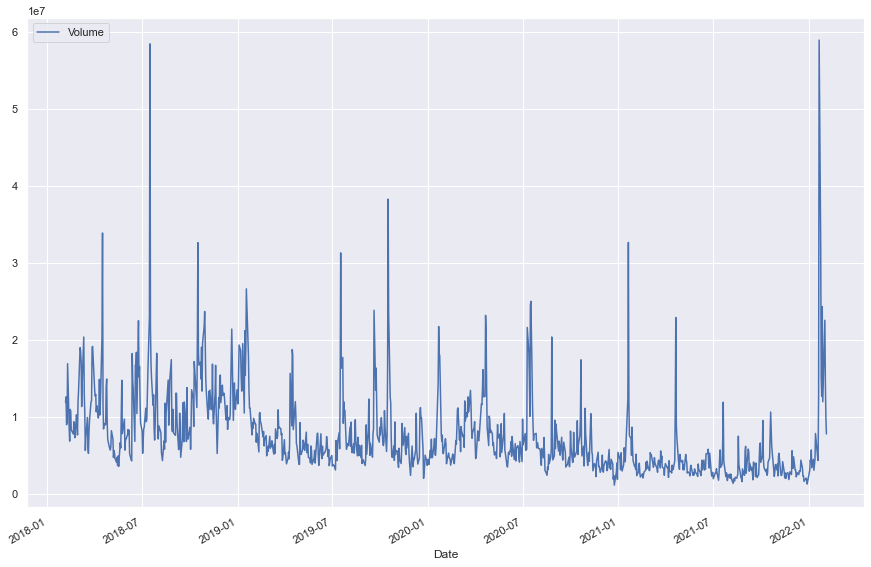

In [7]:
stock_data.plot(y='Volume', figsize=(15,10))

#### Insights:
We can see that the <code>Volume</code> contains many sudden changes. Hence, it may not be useful in predicting the future <code>'Open'</code> values.

### 3. How are the various columns correlated to each other?

In [8]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


#### Insights:
1. The columns <code>Close</code> and <code>Adj Close</code> have a perfect positive ralationship (correlation of +1).
2. The columns <code>Open</code>, <code>High</code>, <code>Low</code> and <code>Close</code> are highly correlated.
3. The <code>Volume</code> column is not correlated to any other columns.

### 4. How is the next <code>Open</code> value correlated to the current values of the columns?

In [9]:
next_open = stock_data['Open'].shift(-1) # Store the next open values
stock_data.corrwith(next_open)

Open         0.994861
High         0.996712
Low          0.996812
Close        0.998056
Adj Close    0.998056
Volume      -0.416253
dtype: float64

#### Insights:
The next <code>Open</code> is most dependent on the current <code>Close</code> value (highest correlation value).

## Train and Test Data

Based on the previous insights, I decide to use the previous <code>Close</code> values to predict the next <code>Open</code> value.

I decide to use the previous 10 <code>Close</code> values to predict the next <code>Open</code> value.

In [10]:
n = 10
X = np.empty((1009-n,n)) # Features
y = np.empty((1009-n,))  # Target

for i in range(n,stock_data.shape[0]):
    X[i-n] = np.array(stock_data.iloc[i-n:i, 3]) # Store the last n 'Close' values as features
    y[i-n] = stock_data.iloc[i, 0]               # Store the current 'Open' value as target

In [11]:
X.shape, y.shape

((999, 10), (999,))

We then split the dataset into train and test datasets.

In [12]:
train_size = X.shape[0]*8//10
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Model Building
We use the <code>LinearRegression</code> model.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

We then fit the model using the training dataset.

In [14]:
model.fit(X_train, y_train)

LinearRegression()

Then let the model predict the targets for the test dataset.

In [15]:
y_pred = model.predict(X_test)

Plot the results to view how close they are to actual values.

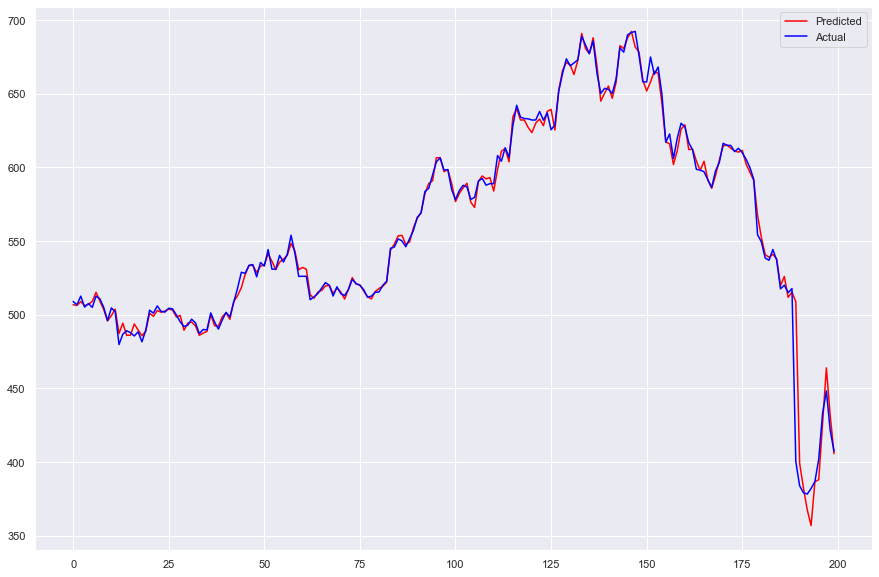

In [16]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(y_test.shape[0]), y_pred, color='red', label='Predicted')
plt.plot(np.arange(y_test.shape[0]), y_test, color='blue', label='Actual')
plt.legend()

### Observation
From the graph, we notice that the model performs poorly at sudden ups and downs. These ups and downs can't be predicted from the previous data alone. Hence, this can be neglected.

## Model Evaluation

We evaluate the model by using the <code>mean_absolute_error</code> function in the <code>sklearn.metrics</code> module. This gives the mean of how much the predicted value varies from the actual value.

We first test for the train data.

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(X_train))

3.444904777154492

We get a mean absolute error of 3.44. This means that the prediction is off by about 3.44 on average.

Similarly, we do this for the test data.

In [18]:
mean_absolute_error(y_test, model.predict(X_test))

3.6750485748227026

We get a mean absolute error of 3.67. This is slightly worse than the train data, but it can be neglected.

## Conclusion
We analysed a dataset on stock prices and built a model that takes the <code>Close</code> values of past 10 days and predict the next <code>Open</code> value. We also observed that the model performs reasonably well, unless there are any sudden ups and downs.